In [1]:
#Tasks:
#1. To find Hotspots of terrorist activities around the world
#2. To draw insights and security issues using EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [3]:
# Acessing directory containing csv file
Dir=os.getcwd()
os.chdir(f'{Dir}\\Downloads'.format(Dir))

In [4]:
df=pd.read_csv('Global_terrorism.csv',encoding='iso-8859-1',)

C:\Users\Anil Jambhulkar\AppData\Local\Temp\ipykernel_48984\3554945238.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Global_terrorism.csv',encoding='iso-8859-1',)


In [5]:
#Making all columns of dataframe visible
pd.set_option('display.max_columns', None)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [6]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [7]:
df.shape

(181691, 135)

In [8]:
#To find all unique number of values in ever column
features = list(df.columns)
count = {} 

for feature in features:
    count[feature] = df[feature].nunique()


In [9]:
count

{'eventid': 181691,
 'iyear': 47,
 'imonth': 13,
 'iday': 32,
 'approxdate': 2244,
 'extended': 2,
 'resolution': 1859,
 'country': 205,
 'country_txt': 205,
 'region': 12,
 'region_txt': 12,
 'provstate': 2855,
 'city': 36673,
 'latitude': 48322,
 'longitude': 48039,
 'specificity': 5,
 'vicinity': 3,
 'location': 44109,
 'summary': 112492,
 'crit1': 2,
 'crit2': 2,
 'crit3': 2,
 'doubtterr': 3,
 'alternative': 5,
 'alternative_txt': 5,
 'multiple': 2,
 'success': 2,
 'suicide': 2,
 'attacktype1': 9,
 'attacktype1_txt': 9,
 'attacktype2': 9,
 'attacktype2_txt': 9,
 'attacktype3': 8,
 'attacktype3_txt': 8,
 'targtype1': 22,
 'targtype1_txt': 22,
 'targsubtype1': 112,
 'targsubtype1_txt': 112,
 'corp1': 33237,
 'target1': 86005,
 'natlty1': 215,
 'natlty1_txt': 215,
 'targtype2': 22,
 'targtype2_txt': 22,
 'targsubtype2': 107,
 'targsubtype2_txt': 107,
 'corp2': 2691,
 'target2': 5043,
 'natlty2': 158,
 'natlty2_txt': 158,
 'targtype3': 20,
 'targtype3_txt': 20,
 'targsubtype3': 92,
 't

In [10]:
#Check the count of attacks took place in particular country
arr = df['country_txt'].to_numpy()
L1 = {}

def attack_count(arr):
    for item in arr:
        if item in L1:
            L1[item] += 1
        else:
            L1[item] = 1
    return L1


In [11]:
attack_count(arr)

{'Dominican Republic': 90,
 'Mexico': 524,
 'Philippines': 6908,
 'Greece': 1275,
 'Japan': 402,
 'United States': 2836,
 'Uruguay': 82,
 'Italy': 1565,
 'East Germany (GDR)': 38,
 'Ethiopia': 190,
 'Guatemala': 2050,
 'Venezuela': 293,
 'West Germany (FRG)': 541,
 'Switzerland': 111,
 'Jordan': 113,
 'Spain': 3249,
 'Brazil': 273,
 'Egypt': 2479,
 'Argentina': 815,
 'Lebanon': 2478,
 'Ireland': 307,
 'Turkey': 4292,
 'Paraguay': 114,
 'Iran': 684,
 'United Kingdom': 5235,
 'Colombia': 8306,
 'Bolivia': 314,
 'Nicaragua': 1970,
 'Netherlands': 130,
 'Belgium': 154,
 'Canada': 96,
 'Australia': 114,
 'Pakistan': 14368,
 'Zambia': 62,
 'Sweden': 132,
 'Costa Rica': 67,
 'South Yemen': 2,
 'Cambodia': 259,
 'Israel': 2183,
 'Poland': 39,
 'Taiwan': 50,
 'Panama': 127,
 'Kuwait': 76,
 'West Bank and Gaza Strip': 2227,
 'Austria': 115,
 'Czechoslovakia': 10,
 'India': 11960,
 'France': 2693,
 'South Vietnam': 1,
 'Brunei': 6,
 'Zaire': 50,
 "People's Republic of the Congo": 4,
 'Portugal': 

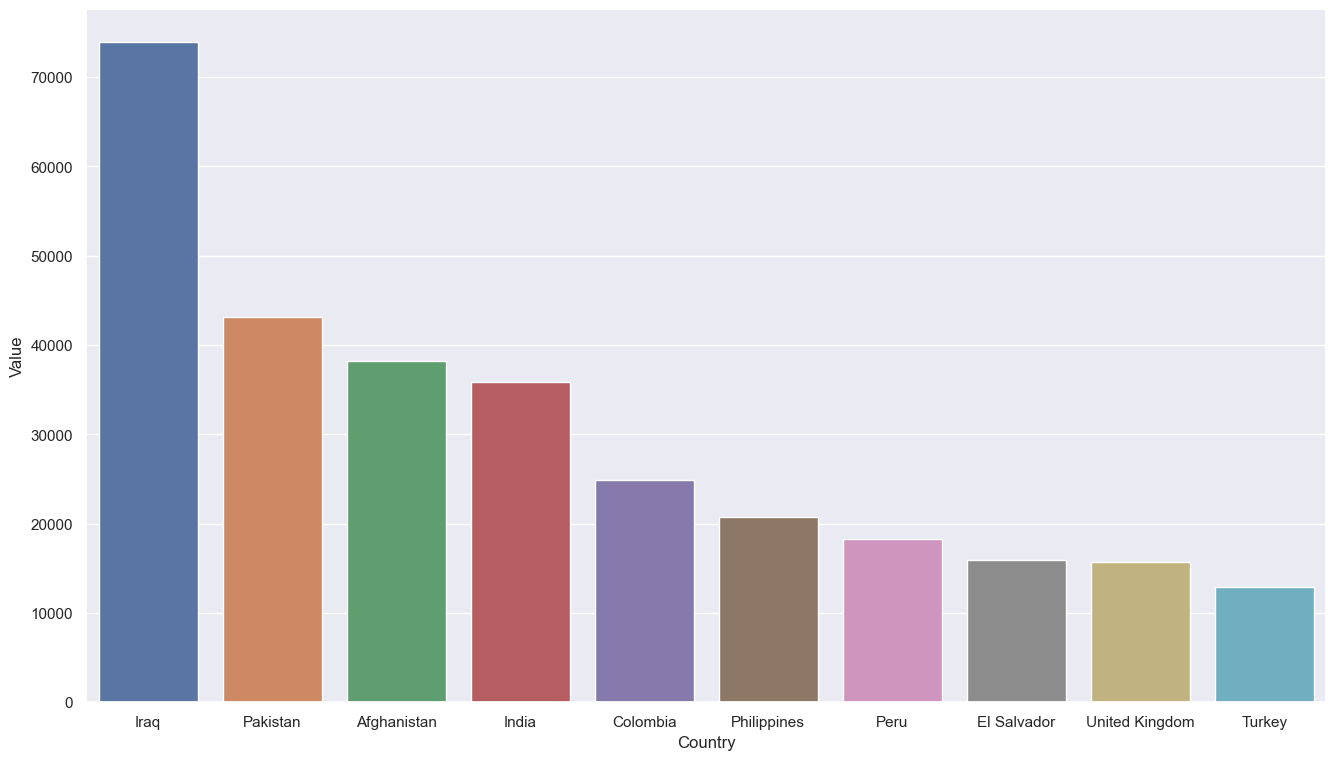

In [13]:
#Top 10 hotspot Countries for terorrist activities
attack_count(arr)
sorted_data = dict(sorted(L1.items(), key=lambda item: item[1], reverse=True)[:10])
A= pd.DataFrame(sorted_data.items(), columns=['Country', 'Value'])
sns.barplot(data=A, x='Country', y='Value')
sns.set(rc={'figure.figsize':(16,9)})

In [14]:
#Check the count of attacks took place in a particular city
arr = df['city'].to_numpy()
L = {}

def attack_count_city(arr):
    for item in arr:
        if item in L:
            L[item] += 1
        else:
            L[item] = 1
    return L

In [15]:
attack_count_city(arr)

{'Santo Domingo': 61,
 'Mexico city': 9,
 'Unknown': 9775,
 'Athens': 1019,
 'Fukouka': 5,
 'Cairo': 216,
 'Montevideo': 71,
 'Oakland': 20,
 'Madison': 8,
 'Baraboo': 1,
 'Denver': 23,
 'Rome': 551,
 'Detroit': 15,
 'Rio Piedras': 17,
 'Berlin': 160,
 'New York City': 460,
 'Rio Grande': 2,
 'Seattle': 39,
 'Champaign': 8,
 'Jersey City': 2,
 'Guatemala City': 755,
 'Quezon City': 62,
 'Caracas': 132,
 'South Sioux City': 7,
 'West Point': 3,
 'Norwalk': 2,
 'Coral Gables': 4,
 'Bamban': 1,
 'Portland': 22,
 'Akron': 6,
 'Dorado': 3,
 'Carolina': 22,
 'Boston': 19,
 'Whitewater': 1,
 'Batavia': 2,
 'Munich': 52,
 'Ypsilanti': 2,
 'Berkeley': 33,
 'Eugene': 12,
 'San Francisco': 111,
 'Buckeystown': 1,
 'Covington': 2,
 'Cleveland': 8,
 'Vallejo': 1,
 'Hartford': 2,
 'Frankfurt': 98,
 'Zurich': 27,
 'Ithaca': 4,
 'Prairie du Sac': 1,
 'Tucson': 4,
 'Boulder': 9,
 'Hebron': 203,
 'Manila': 488,
 'Colorado Springs': 5,
 'Martinez': 1,
 'San Juan': 143,
 'Ashville': 1,
 'Bridgeport': 2,
 

<Axes: xlabel='City', ylabel='Value'>

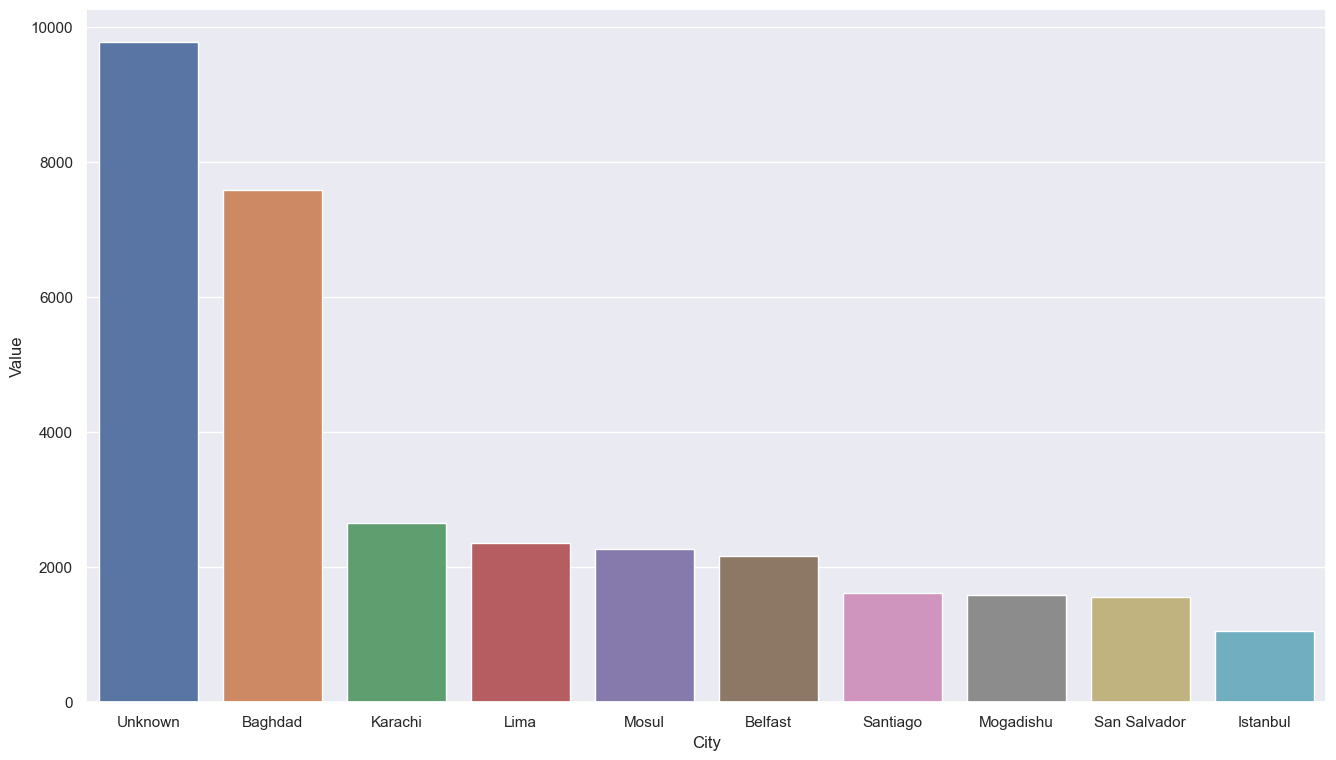

In [16]:
#Top 10 hotspot Cities for terorrist activities
attack_count(arr)
sorted_data1 = dict(sorted(L.items(), key=lambda item: item[1], reverse=True)[:10])
D1= pd.DataFrame(sorted_data1.items(), columns=['City', 'Value'])
sns.barplot(data=D1, x='City', y='Value')

In [17]:
#Check the count of attacks done by a particular gang or organization
arr = df['gname'].to_numpy()
L = {}

def gang_attack_count(arr):
    for item in arr:
        if item in L:
            L[item] += 1
        else:
            L[item] = 1
    return L

In [18]:
gang_attack_count(arr)

{'MANO-D': 1,
 '23rd of September Communist League': 44,
 'Unknown': 82782,
 'Black Nationalists': 92,
 'Tupamaros (Uruguay)': 41,
 "New Year's Gang": 4,
 'Weather Underground, Weathermen': 45,
 'Left-Wing Militants': 173,
 'Armed Commandos of Liberation': 13,
 'Commune 1': 1,
 'Eritrean Liberation Front': 21,
 'Strikers': 48,
 'Student Radicals': 74,
 'White extremists': 105,
 'Armed Forces of National Liberation- Venezuela (FALN)': 4,
 "New People's Army (NPA)": 2772,
 'Armed Revolutionary Independence Movement (MIRA)': 30,
 'Popular Front for the Liberation of Palestine (PFLP)': 153,
 'Popular Front for the Liberation of Palestine, Gen Cmd (PFLP-GC)': 8,
 '1st of May Group': 4,
 'Rebel Armed Forces of Guatemala (FAR)': 36,
 'Ku Klux Klan': 26,
 'Popular Revolutionary Vanguard (VPR)': 5,
 'Revolutionary Force 9': 3,
 'Puerto Rican Nationalists': 26,
 'Chicano Liberation Front': 31,
 'Puerto Rican Resistance Movement': 3,
 'Black Panthers': 24,
 'Dominican Popular Movement (MPD)': 2,


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Taliban'),
  Text(2, 0, 'Islamic State of Iraq and the Levant (ISIL)'),
  Text(3, 0, 'Shining Path (SL)'),
  Text(4, 0, 'Farabundo Marti National Liberation Front (FMLN)'),
  Text(5, 0, 'Al-Shabaab'),
  Text(6, 0, "New People's Army (NPA)"),
  Text(7, 0, 'Irish Republican Army (IRA)'),
  Text(8, 0, 'Revolutionary Armed Forces of Colombia (FARC)'),
  Text(9, 0, 'Boko Haram')])

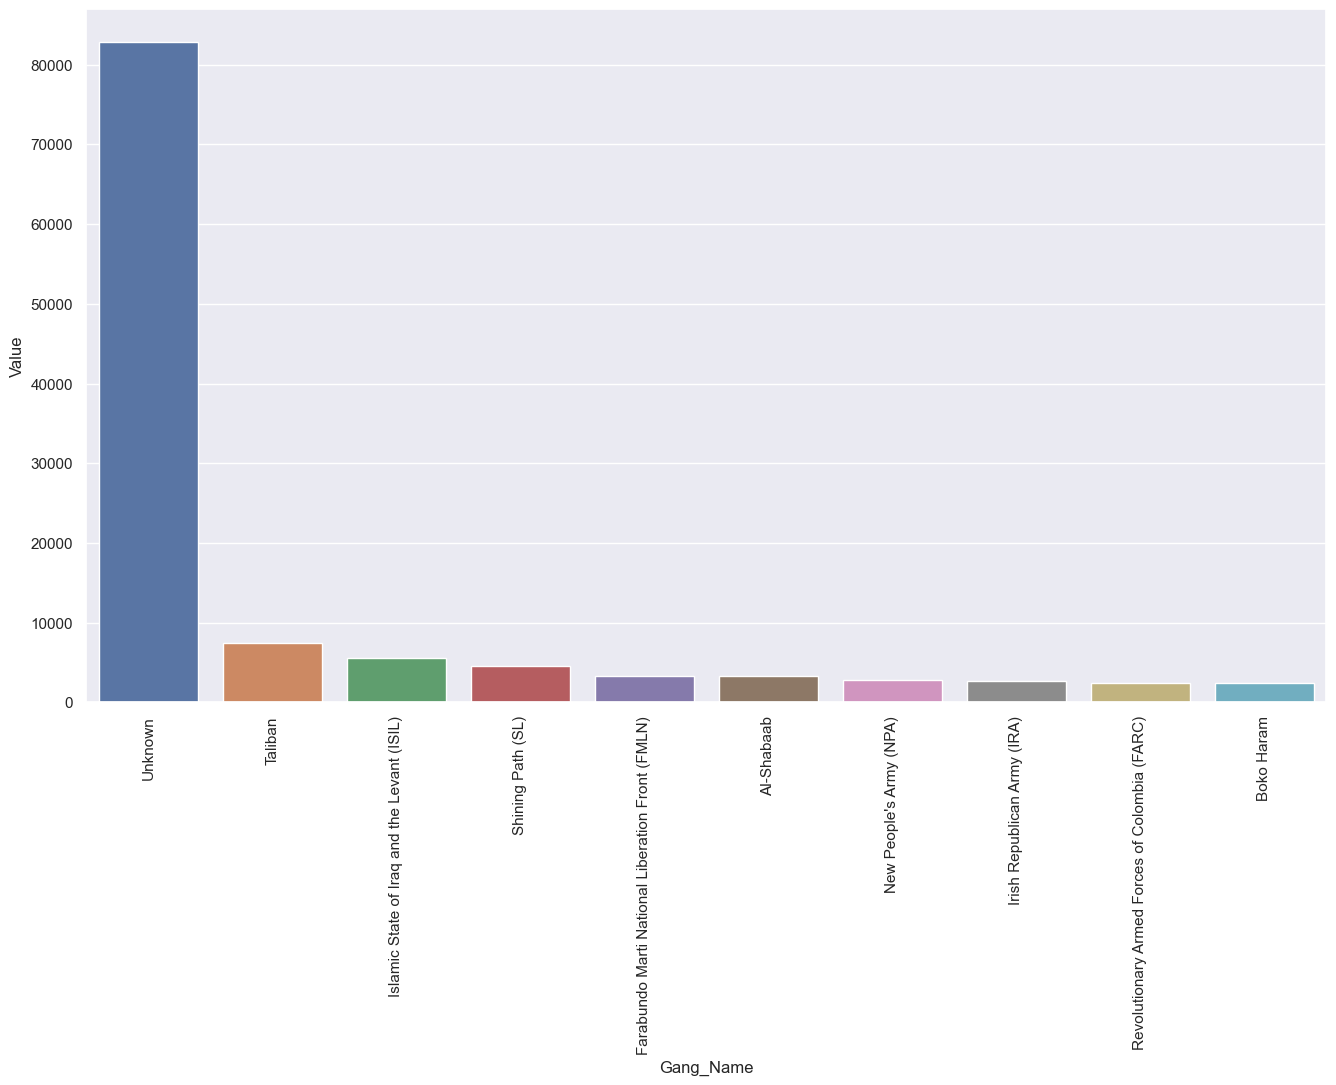

In [19]:
#Top 10 most active gangs or organizations involved in terorrist activities
attack_count(arr)
sorted_data2 = dict(sorted(L.items(), key=lambda item: item[1], reverse=True)[:10])
D2= pd.DataFrame(sorted_data2.items(), columns=['Gang_Name', 'Value'])
sns.barplot(data=D2, x='Gang_Name', y='Value')
plt.xticks(rotation=90)

In [21]:
#Check the count of attacks done on a particular target type
arr = df['targtype1_txt'].to_numpy()
L = {}

def target_attack_count(arr):
    for item in arr:
        if item in L:
            L[item] += 1
        else:
            L[item] = 1
    return L

In [22]:
target_attack_count(arr)

{'Private Citizens & Property': 43511,
 'Government (Diplomatic)': 3573,
 'Journalists & Media': 2948,
 'Police': 24506,
 'Utilities': 6023,
 'Military': 27984,
 'Government (General)': 21283,
 'Airports & Aircraft': 1343,
 'Business': 20669,
 'Educational Institution': 4322,
 'Violent Political Party': 1866,
 'Religious Figures/Institutions': 4440,
 'Unknown': 5898,
 'Transportation': 6799,
 'Tourists': 440,
 'NGO': 970,
 'Telecommunication': 1009,
 'Food or Water Supply': 317,
 'Terrorists/Non-State Militia': 3039,
 'Other': 137,
 'Maritime': 351,
 'Abortion Related': 263}

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Private Citizens & Property'),
  Text(1, 0, 'Military'),
  Text(2, 0, 'Police'),
  Text(3, 0, 'Government (General)'),
  Text(4, 0, 'Business'),
  Text(5, 0, 'Transportation'),
  Text(6, 0, 'Utilities'),
  Text(7, 0, 'Unknown'),
  Text(8, 0, 'Religious Figures/Institutions'),
  Text(9, 0, 'Educational Institution')])

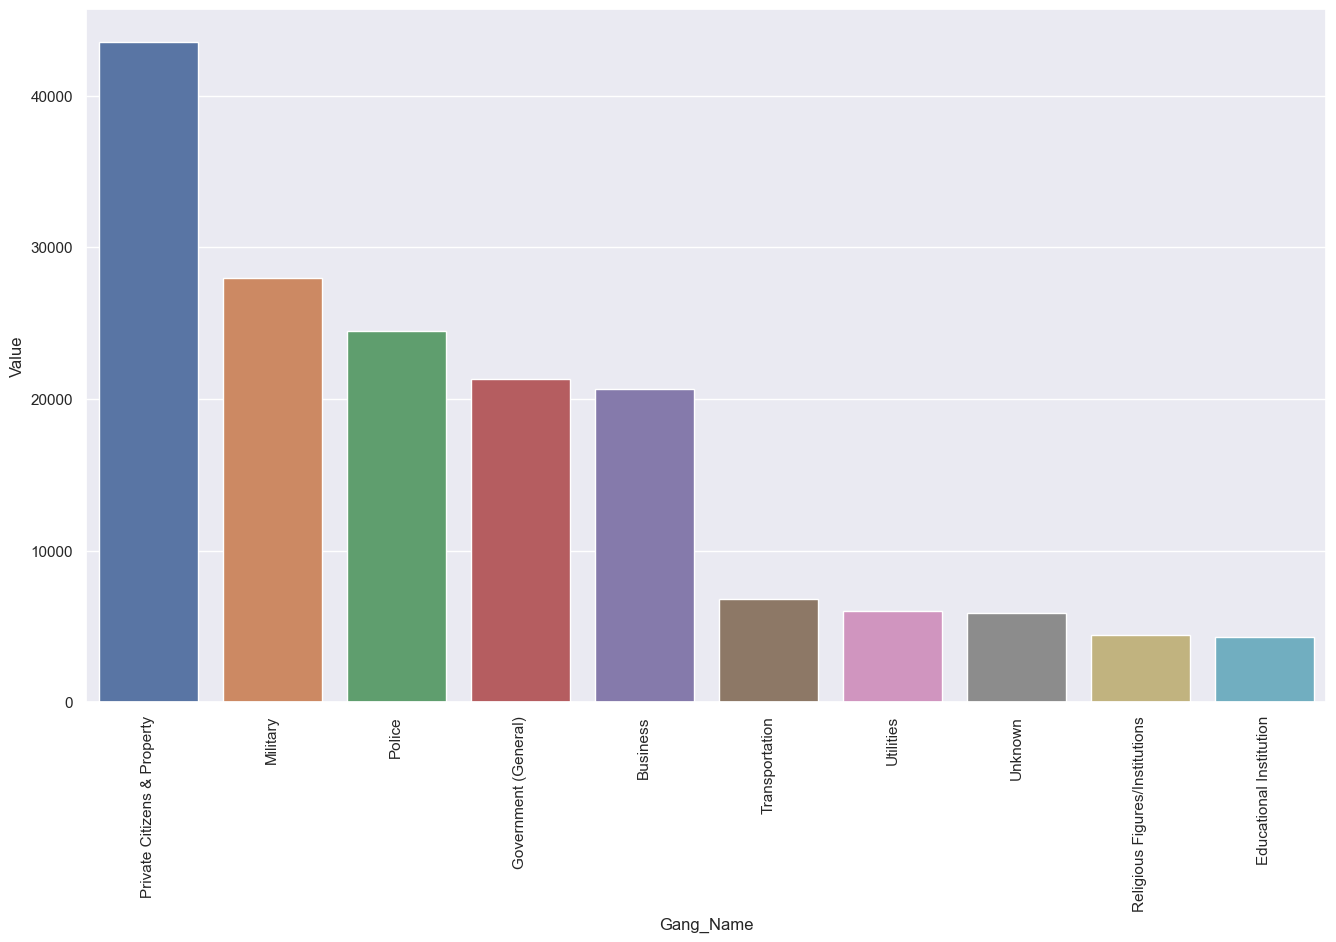

In [23]:
#Top 10 most targeted entities
attack_count(arr)
sorted_data3 = dict(sorted(L.items(), key=lambda item: item[1], reverse=True)[:10])
D3= pd.DataFrame(sorted_data3.items(), columns=['Gang_Name', 'Value'])
sns.barplot(data=D3, x='Gang_Name', y='Value')
plt.xticks(rotation=90)

In [24]:
#Check the count of attacks related to any other events
arr = df['related'].to_numpy()
L = {}

def related_attack_count(arr):
    for item in arr:
        if item in L:
            L[item] += 1
        else:
            L[item] = 1
    return L

In [25]:
related_attack_count(arr)

{nan: 156653,
 '197001300001, 197001300002': 2,
 '197002030001, 197002030002': 2,
 '197002060004, 197002060005, 197002060006': 3,
 '197002080001, 197002080002, 197002090003': 3,
 '197002160001, 197002160004': 2,
 '197002160002, 197002160003': 2,
 '197002230001, 197002230002, 197002230003, 197002230004': 4,
 '197003060003, 197003060004': 2,
 '197003120001, 197003120002, 197003120005': 3,
 '197003120003, 197003120004': 2,
 '197003130001, 197003130002': 2,
 '197003210002, 197003210003': 2,
 '197003220001, 197003220002, 197003220003': 3,
 '197004040001, 197004040002': 2,
 '197004130002, 197004130003, 197004130004': 3,
 '197004150004, 197004150005': 2,
 '197004160001, 197004160002, 197004160003': 3,
 '197004190001, 197004190002, 197004190003, 197004190004': 4,
 '197004220002, 197004220003': 2,
 '197004230001, 197004230002, 197004230003, 197004230004': 4,
 '197004250004, 197004250005, 197004250006': 3,
 '197004260001, 197004260002': 2,
 '197005010005, 197005010006': 2,
 '197005260001, 197005

In [26]:
#Check the count of particular motives behind an event
arr = df['motive'].to_numpy()
L = {}

def motive_count(arr):
    for item in arr:
        if item in L:
            L[item] += 1
        else:
            L[item] = 1
    return L

In [27]:
motive_count(arr)

{nan: 131130,
 'To protest the Cairo Illinois Police Deparment': 1,
 'To protest the War in Vietnam and the draft': 5,
 'Protest the draft and Vietnam War': 2,
 'To protest United States owned businesses in Puerto Rico': 4,
 'Suspected motives were to protest the Vietnam War and/or show support for the Black Panther Party and/or show support for the Young Lords.': 1,
 'Retaliation for the store owner who shot and killed an African American attempting to commit a robbery at his store.': 1,
 'The incident took place during disturbances between the Black Student Union and the university.': 1,
 'The incident took place during heightened antiwar sentiments in Seattle Washington.': 1,
 'Intimidate the Black Panther Party.': 1,
 'The attack occurred during the violent Iowa Beef Packers strike in South Sioux City.': 7,
 'The motive of the attack was to prevent the African American community of West Point Mississippi from organizing.': 1,
 'To kill police': 24,
 'African American opposition to 

In [ ]:
#Tracking over the period of time how the occurrence of terrorist activities has happened(frequency).
sns.histplot(data=df, x="iyear", kde=True)

In [ ]:
#Tracking terrorist activities which occurs most frequently.
sns.histplot(data=df, y="attacktype1_txt", kde=True)
sns.set(rc={'figure.figsize':(15,8)})

In [ ]:
#Count of types of weapons being used in various events
sns.histplot(data=df, y="weapsubtype1_txt", kde=True)

In [ ]:
#Types of weapons being used over period of time
g=sns.scatterplot(data=df, x='weapsubtype1_txt', y='iyear', size=5)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(7,4)})

In [ ]:
#Types of weapons used in different countries
sns.scatterplot(data=df, x="weaptype1_txt", y="country")
plt.xticks(rotation=90)

In [ ]:
#Types of weapons used in different regions
sns.stripplot(data=df, x="weaptype1_txt", y="region_txt")
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(15,8)})

In [ ]:
# Success rate of attaks
import matplotlib.pyplot as plt

slices = df['success'].value_counts()
condition = ['success','failed']

plt.pie(slices,
        labels=condition,
        startangle=90,
        shadow=True,
        explode=(0.1,0),
        autopct='%1.1f%%',
        )

plt.title('Success rate of attaks')
plt.show()


In [ ]:
# Sucide rate in the attaks

slices = df['suicide'].value_counts()
condition = ['no_suicide','suicide']

plt.pie(slices,
        labels=condition,
        startangle=90,
        shadow=True,
        explode=(0.1,0),
        autopct='%1.1f%%',
        )

plt.title('Sucide rate in the attaks')
plt.show()

In [ ]:
# #Total attacks every year
# sns.countplot(df, x="iyear")
# plt.xticks(rotation=90)

In [ ]:
#Attacks (successful and unsuccessful seprately) every year in a particular region
sns.countplot(df, x="region_txt",hue='success')
plt.xticks(rotation=90)

In [ ]:
sns.scatterplot(data=df, x='ransomamt', y='ransompaid')
g.set_yscale("log")
g.set_xscale("log")
sns.set(rc={'figure.figsize':(7,4)})

In [ ]:
# Finding outlier values in some major features

cols=['eventid','iyear','country','region','attacktype1','targtype1','targsubtype1','weaptype1','ransomamt','ransompaid']

for col in cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()